## 1: Model building in scikit-learn

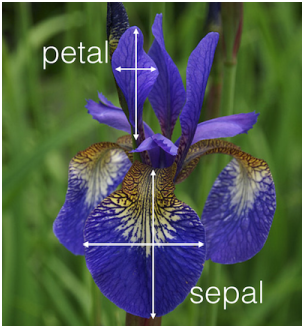

In [ ]:
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

**"Features"** are also known as predictors, inputs, or attributes. The **"response"** is also known as the target, label, or output.

In [2]:
# check the shapes of X and y
print(X.shape)
print(y.shape)

NameError: name 'X' is not defined

**"Observations"** are also known as samples, instances, or records.

In [13]:
# examine the first 5 rows of the feature matrix (including the feature names)
import pandas as pd
pd.DataFrame(X, columns=iris.feature_names).head()

NameError: name 'X' is not defined

In [ ]:
# examine the response vector
print(y)

In order to **build a model**, the features must be **numeric**, and every observation must have the **same features in the same order**.

In [ ]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (with the default parameters)
knn = KNeighborsClassifier()

# fit the model with data (occurs in-place)
knn.fit(X, y)

In order to **make a prediction**, the new observation must have the **same features as the training observations**, both in number and meaning.

In [ ]:
# predict the response for a new observation
knn.predict([[3, 5, 4, 2]])

## 2: Representing text as numerical data

In [6]:
# example text for model training (SMS messages)
inbox_train = ['Summand your colleagues','my birthday is tomorrow', 'Meeting at noon', 'BLACK PANTHER is released']
is_job_related= [1,0,1,0]

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":

In [7]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [8]:
# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(inbox_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [9]:
# examine the fitted vocabulary
vect.get_feature_names()

['at',
 'birthday',
 'black',
 'colleagues',
 'is',
 'meeting',
 'my',
 'noon',
 'panther',
 'released',
 'summand',
 'tomorrow',
 'your']

In [10]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(inbox_train)
simple_train_dtm

<4x13 sparse matrix of type '<class 'numpy.int64'>'
	with 14 stored elements in Compressed Sparse Row format>

In [11]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]])

In [12]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names())

NameError: name 'pd' is not defined

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> In this scheme, features and samples are defined as follows:

> - Each individual token occurrence frequency (normalized or not) is treated as a **feature**.
> - The vector of all the token frequencies for a given document is considered a multivariate **sample**.

> A **corpus of documents** can thus be represented by a matrix with **one row per document** and **one column per token** (e.g. word) occurring in the corpus.

> We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [ ]:
# check the type of the document-term matrix
type(simple_train_dtm)

In [ ]:
# examine the sparse matrix contents
print(simple_train_dtm)

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have **many feature values that are zeros** (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to **store such a matrix in memory** but also to **speed up operations**, implementations will typically use a **sparse representation** such as the implementations available in the `scipy.sparse` package.

In [ ]:
# example text for model testing
simple_test = ["please don't call me"]

In order to **make a prediction**, the new observation must have the **same features as the training observations**, both in number and meaning.

In [ ]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

In [ ]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names())

**Summary:**

- `vect.fit(train)` **learns the vocabulary** of the training data
- `vect.transform(train)` uses the **fitted vocabulary** to build a document-term matrix from the training data
- `vect.transform(test)` uses the **fitted vocabulary** to build a document-term matrix from the testing data (and **ignores tokens** it hasn't seen before)

## Part 3: Reading a text-based dataset into pandas

In [ ]:
# read file into pandas using a relative path
path = 'data/sms.tsv'
sms = pd.read_table(path, header=None, names=['label', 'message'])

In [ ]:
# alternative: read file into pandas from a URL
# url = 'https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv'
# sms = pd.read_table(url, header=None, names=['label', 'message'])

In [ ]:
# examine the shape
sms.shape

In [ ]:
# examine the first 10 rows
sms.head(10)

In [ ]:
# examine the class distribution
sms.label.value_counts()

In [ ]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

In [ ]:
# check that the conversion worked
sms.head(10)

In [ ]:
# how to define X and y (from the iris data) for use with a MODEL
X = iris.data
y = iris.target
print(X.shape)
print(y.shape)

In [ ]:
# how to define X and y (from the SMS data) for use with COUNTVECTORIZER
X = sms.message
y = sms.label_num
print(X.shape)
print(y.shape)

In [ ]:
# split X and y into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

## Part 4: Vectorizing our dataset

In [ ]:
# instantiate the vectorizer
vect = CountVectorizer()

In [ ]:
# learn training data vocabulary, then use it to create a document-term matrix
vect.fit(X_train)
X_train_dtm = vect.transform(X_train)

In [ ]:
# equivalently: combine fit and transform into a single step
X_train_dtm = vect.fit_transform(X_train)

In [ ]:
# examine the document-term matrix
X_train_dtm

In [ ]:
# transform testing data (using fitted vocabulary) into a document-term matrix
X_test_dtm = vect.transform(X_test)
X_test_dtm

## Part 5: Building and evaluating a model

We will use [multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html):

> The multinomial Naive Bayes classifier is suitable for classification with **discrete features** (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.

In [ ]:
# import and instantiate a Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [ ]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
%time nb.fit(X_train_dtm, y_train)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = nb.predict(X_test_dtm)

In [ ]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
# print the confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

In [ ]:
# print message text for the false positives (ham incorrectly classified as spam)


In [ ]:
# print message text for the false negatives (spam incorrectly classified as ham)


In [ ]:
# example false negative
X_test[3132]

In [ ]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

In [ ]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

## Part 6: Comparing models

We will compare multinomial Naive Bayes with [logistic regression](http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression):

> Logistic regression, despite its name, is a **linear model for classification** rather than regression. Logistic regression is also known in the literature as logit regression, maximum-entropy classification (MaxEnt) or the log-linear classifier. In this model, the probabilities describing the possible outcomes of a single trial are modeled using a logistic function.

In [ ]:
# import and instantiate a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [ ]:
# train the model using X_train_dtm
%time logreg.fit(X_train_dtm, y_train)

In [ ]:
# make class predictions for X_test_dtm
y_pred_class = logreg.predict(X_test_dtm)

In [ ]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = logreg.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

In [ ]:
# calculate accuracy
metrics.accuracy_score(y_test, y_pred_class)

In [ ]:
# calculate AUC
metrics.roc_auc_score(y_test, y_pred_prob)

## Part 7: Examining a model for further insight

We will examine the our **trained Naive Bayes model** to calculate the approximate **"spamminess" of each token**.

In [ ]:
# store the vocabulary of X_train
X_train_tokens = vect.get_feature_names()
len(X_train_tokens)

In [ ]:
# examine the first 50 tokens
print(X_train_tokens[0:50])

In [ ]:
# examine the last 50 tokens
print(X_train_tokens[-50:])

In [ ]:
# Naive Bayes counts the number of times each token appears in each class
nb.feature_count_

In [ ]:
# rows represent classes, columns represent tokens
nb.feature_count_.shape

In [ ]:
# number of times each token appears across all HAM messages
ham_token_count = nb.feature_count_[0, :]
ham_token_count

In [ ]:
# number of times each token appears across all SPAM messages
spam_token_count = nb.feature_count_[1, :]
spam_token_count

In [ ]:
# create a DataFrame of tokens with their separate ham and spam counts
tokens = pd.DataFrame({'token':X_train_tokens, 'ham':ham_token_count, 'spam':spam_token_count}).set_index('token')
tokens.head()

In [ ]:
# examine 5 random DataFrame rows
tokens.sample(5, random_state=6)

In [ ]:
# Naive Bayes counts the number of observations in each class
nb.class_count_

Before we can calculate the "spamminess" of each token, we need to avoid **dividing by zero** and account for the **class imbalance**.

In [ ]:
# add 1 to ham and spam counts to avoid dividing by 0
tokens['ham'] = tokens.ham + 1
tokens['spam'] = tokens.spam + 1
tokens.sample(5, random_state=6)

In [ ]:
# convert the ham and spam counts into frequencies
tokens['ham'] = tokens.ham / nb.class_count_[0]
tokens['spam'] = tokens.spam / nb.class_count_[1]
tokens.sample(5, random_state=6)

In [ ]:
# calculate the ratio of spam-to-ham for each token
tokens['spam_ratio'] = tokens.spam / tokens.ham
tokens.sample(5, random_state=6)

In [ ]:
# examine the DataFrame sorted by spam_ratio
# note: use sort() instead of sort_values() for pandas 0.16.2 and earlier
tokens.sort_values('spam_ratio', ascending=False)

In [ ]:
# look up the spam_ratio for a given token
tokens.loc['dating', 'spam_ratio']

## Part 8: Practicing this workflow on another dataset

Please open the **`exercise.ipynb`** notebook (or the **`exercise.py`** script).

## Part 9: Tuning the vectorizer (discussion)

Thus far, we have been using the default parameters of [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html):

In [ ]:
# show default parameters for CountVectorizer
vect

However, the vectorizer is worth tuning, just like a model is worth tuning! Here are a few parameters that you might want to tune:

- **stop_words:** string {'english'}, list, or None (default)
    - If 'english', a built-in stop word list for English is used.
    - If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
    - If None, no stop words will be used.

In [ ]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

- **ngram_range:** tuple (min_n, max_n), default=(1, 1)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted.
    - All values of n such that min_n <= n <= max_n will be used.

In [ ]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

- **max_df:** float in range [0.0, 1.0] or int, default=1.0
    - When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [ ]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

- **min_df:** float in range [0.0, 1.0] or int, default=1
    - When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. (This value is also called "cut-off" in the literature.)
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [ ]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

**Guidelines for tuning CountVectorizer:**

- Use your knowledge of the **problem** and the **text**, and your understanding of the **tuning parameters**, to help you decide what parameters to tune and how to tune them.
- **Experiment**, and let the data tell you the best approach!